In [37]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('Sentiment.csv')

In [38]:
df.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [39]:
df = pd.read_csv('Sentiment.csv')

display(df['candidate']) 

0        No candidate mentioned
1                  Scott Walker
2        No candidate mentioned
3        No candidate mentioned
4                  Donald Trump
                  ...          
13866    No candidate mentioned
13867             Mike Huckabee
13868                  Ted Cruz
13869              Donald Trump
13870                  Ted Cruz
Name: candidate, Length: 13871, dtype: object

In [40]:
candidates = df['candidate']

candidates

0        No candidate mentioned
1                  Scott Walker
2        No candidate mentioned
3        No candidate mentioned
4                  Donald Trump
                  ...          
13866    No candidate mentioned
13867             Mike Huckabee
13868                  Ted Cruz
13869              Donald Trump
13870                  Ted Cruz
Name: candidate, Length: 13871, dtype: object

In [41]:
df['candidate'].value_counts()['Donald Trump']

2813

In [42]:
df['candidate'] == 'Donald Trump'

0        False
1        False
2        False
3        False
4         True
         ...  
13866    False
13867    False
13868    False
13869     True
13870    False
Name: candidate, Length: 13871, dtype: bool

In [43]:
df.columns

Index(['id', 'candidate', 'candidate_confidence', 'relevant_yn',
       'relevant_yn_confidence', 'sentiment', 'sentiment_confidence',
       'subject_matter', 'subject_matter_confidence', 'candidate_gold', 'name',
       'relevant_yn_gold', 'retweet_count', 'sentiment_gold',
       'subject_matter_gold', 'text', 'tweet_coord', 'tweet_created',
       'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [44]:
df.dtypes

id                             int64
candidate                     object
candidate_confidence         float64
relevant_yn                   object
relevant_yn_confidence       float64
sentiment                     object
sentiment_confidence         float64
subject_matter                object
subject_matter_confidence    float64
candidate_gold                object
name                          object
relevant_yn_gold              object
retweet_count                  int64
sentiment_gold                object
subject_matter_gold           object
text                          object
tweet_coord                   object
tweet_created                 object
tweet_id                       int64
tweet_location                object
user_timezone                 object
dtype: object

In [45]:
df['candidate'].value_counts()

No candidate mentioned    7491
Donald Trump              2813
Jeb Bush                   705
Ted Cruz                   637
Ben Carson                 404
Mike Huckabee              393
Chris Christie             293
Marco Rubio                275
Rand Paul                  263
Scott Walker               259
John Kasich                242
Name: candidate, dtype: int64

In [46]:
df['subject_matter'].value_counts()

None of the above                       8148
FOX News or Moderators                  2900
Religion                                 407
Foreign Policy                           366
Women's Issues (not abortion though)     362
Racial issues                            353
Abortion                                 293
Jobs and Economy                         251
Immigration                              211
LGBT issues                              126
Healthcare (including Medicare)           67
Gun Control                               61
Name: subject_matter, dtype: int64

In [47]:
piechart_data = df['subject_matter'].value_counts()


In [48]:
print(piechart_data)

None of the above                       8148
FOX News or Moderators                  2900
Religion                                 407
Foreign Policy                           366
Women's Issues (not abortion though)     362
Racial issues                            353
Abortion                                 293
Jobs and Economy                         251
Immigration                              211
LGBT issues                              126
Healthcare (including Medicare)           67
Gun Control                               61
Name: subject_matter, dtype: int64


In [49]:
piechart_dict = piechart_data.to_dict()
piechart_dict

{'None of the above': 8148,
 'FOX News or Moderators': 2900,
 'Religion': 407,
 'Foreign Policy': 366,
 "Women's Issues (not abortion though)": 362,
 'Racial issues': 353,
 'Abortion': 293,
 'Jobs and Economy': 251,
 'Immigration': 211,
 'LGBT issues': 126,
 'Healthcare (including Medicare)': 67,
 'Gun Control': 61}

In [51]:
piechart_df = pd.DataFrame.from_dict(piechart_dict, orient="index").reset_index()
piechart_df.columns = ['suject_matter', 'mentioned']
piechart_df

,suject_matter,mentioned
0,None of the above,8148
1,FOX News or Moderators,2900
2,Religion,407
3,Foreign Policy,366
4,Women's Issues (not abortion though),362
5,Racial issues,353
6,Abortion,293
7,Jobs and Economy,251
8,Immigration,211
9,LGBT issues,126


<AxesSubplot:ylabel='mentioned'>

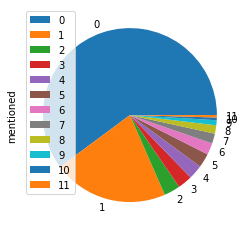

In [53]:
piechart_df.plot(x="subject_matter", y="mentioned", kind="pie")

In [55]:
piechart_data = df['candidate'].value_counts()

print(piechart_data)

No candidate mentioned    7491
Donald Trump              2813
Jeb Bush                   705
Ted Cruz                   637
Ben Carson                 404
Mike Huckabee              393
Chris Christie             293
Marco Rubio                275
Rand Paul                  263
Scott Walker               259
John Kasich                242
Name: candidate, dtype: int64


In [56]:
piechart_dict = piechart_data.to_dict()
piechart_dict

{'No candidate mentioned': 7491,
 'Donald Trump': 2813,
 'Jeb Bush': 705,
 'Ted Cruz': 637,
 'Ben Carson': 404,
 'Mike Huckabee': 393,
 'Chris Christie': 293,
 'Marco Rubio': 275,
 'Rand Paul': 263,
 'Scott Walker': 259,
 'John Kasich': 242}

In [57]:
piechart_df = pd.DataFrame.from_dict(piechart_dict, orient="index").reset_index()
piechart_df.columns = ['candidates', 'mentioned']
piechart_df

,candidates,mentioned
0,No candidate mentioned,7491
1,Donald Trump,2813
2,Jeb Bush,705
3,Ted Cruz,637
4,Ben Carson,404
5,Mike Huckabee,393
6,Chris Christie,293
7,Marco Rubio,275
8,Rand Paul,263
9,Scott Walker,259


<AxesSubplot:ylabel='mentioned'>

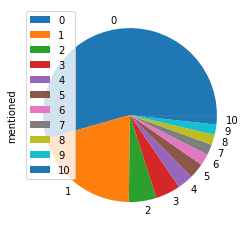

In [58]:
piechart_df.plot(x="candidates", y="mentioned", kind="pie")